#DelayCat De-Essing Experimental Results

In this notebook, we will test DelayCat feature-parameter bindings by evaluating their efficacy through use as a means of de-essing a vocal sample. DelayCat de-esses its signal through mapping measures of noise (in this case, spectral flatness) to volume, where higher noise leads to lower volume.

Evaluation will be done by comparing measurements of DelayCat's de-essed signal with a commercial de-esser.

#Installs
Only necessary for some environments, such as binder.

In [1]:
# uncomment if necessary or set up your environment accordingly
#%pip install matplotlib
#%pip install scipy
#%pip install sklearn
#%pip install scikit-learn
#%pip install librosa

#Imports

In [2]:
%matplotlib inline
from pathlib import Path
import numpy, scipy, matplotlib.pyplot as plt, sklearn, urllib, IPython.display as ipd
import librosa, librosa.display
import urllib.request

#Load Files

In [3]:
control_fn = urllib.request.urlretrieve('https://drive.google.com/uc?export=download&id=1LIQAbsEDl1PCpyvPZ4c1fSzVyiBYKsZ1')[0]
control, control_sr = librosa.load(control_fn)
delaycat_fn = urllib.request.urlretrieve('https://drive.google.com/uc?export=download&id=1-Yxgp10WE1p_i2t-3HepdHuasvGLqMSM')[0]
delaycat, delaycat_sr = librosa.load(delaycat_fn)
commercial_fn = urllib.request.urlretrieve('https://drive.google.com/uc?export=download&id=15SqL9wX6zRni_FSL9A8oPBxNzPzqnFvz')[0]
commercial, commercial_sr = librosa.load(commercial_fn)

#assert(len(control) == len(delaycat) == len(commercial))
#assert(control_sr == delaycat_sr == commercial_sr)
sr = control_sr

##Control Audio

Uneffected audio sample.

In [4]:
display(ipd.Audio(control, rate=sr))

/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=15
  warnings.warn(


control noise (amp * flatness): 331.18587865747025
control total amp: 11684.945575379854
control noise ratio (total noise / total amp): 0.028342954318527416


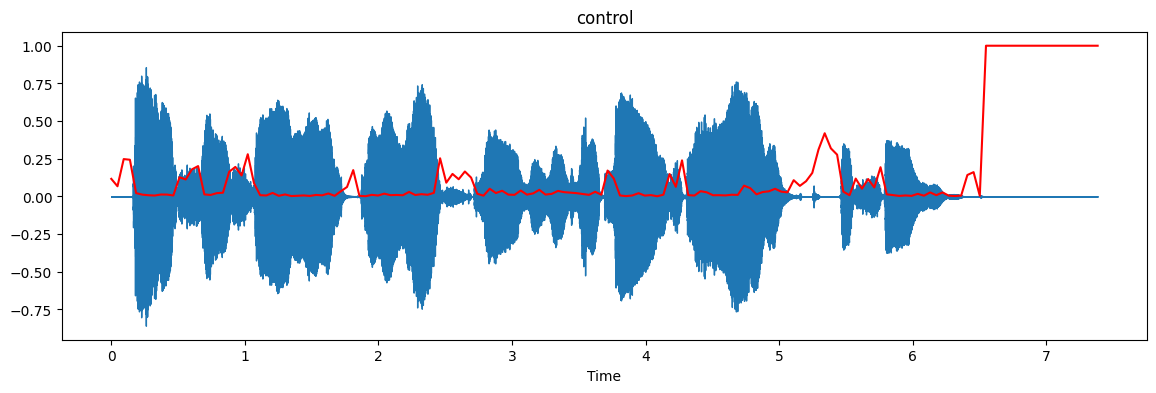

In [5]:
plt.figure(figsize=(14, 4))
plt.title('control')
librosa.display.waveshow(control, sr=sr)

control_flatness = numpy.array([librosa.feature.spectral_flatness(y=control[i: i + 1024], n_fft=1024)[0, 0] for i in range(0, len(control), 1024)])
t = librosa.frames_to_time(range(len(control_flatness))) * 2
plt.plot(t, control_flatness, color='r')

control_blocks = [control[i : i + 1024] for i in range(0, len(control), 1024)]
control_total_noise = 0
for i in range(len(control_blocks)):
  for s in control_blocks[i]:
    control_total_noise += abs(s) * control_flatness[i]
print('control noise (amp * flatness):', control_total_noise)
control_total_amp = sum(abs(control))
print('control total amp:', control_total_amp)
control_noise_ratio = control_total_noise / control_total_amp
print('control noise ratio (total noise / total amp):', control_noise_ratio)

##Delay Cat Audio

DelayCat delayed signal with a parameter binding to make noisy / sibilant segments quieter.

This signal is a DELAYED signal, so it has been artificially shifted back here for comparisons sake.

This same process can be done with a delay time of 0 and shifting enabled, however the result is not as clean because of the innevitable offset of windowed analysis data.

In [6]:
display(ipd.Audio(delaycat, rate=sr))

Below is the plotted waveform, with the spectral flatness overlaid. The second waveform is drawn on top of the dry signal, where the red shows what part of the waveform has been removed.

delaycat noise (amp * flatness): 200.9144761743412
delaycat total amp: 10717.572909016897
delaycat noise ratio (total noise / total amp): 0.018746266331
delaycat noise reduction ratio (delaycat noise / control noise): 0.6066516996098661


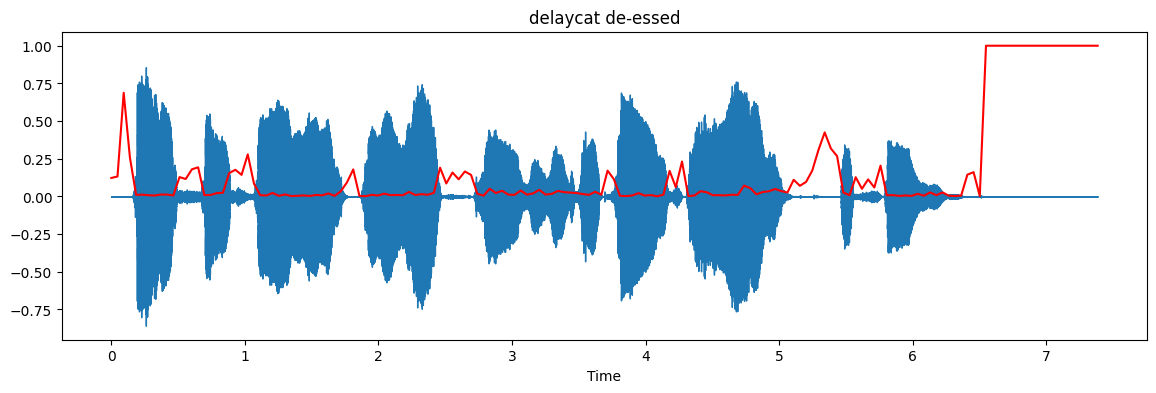

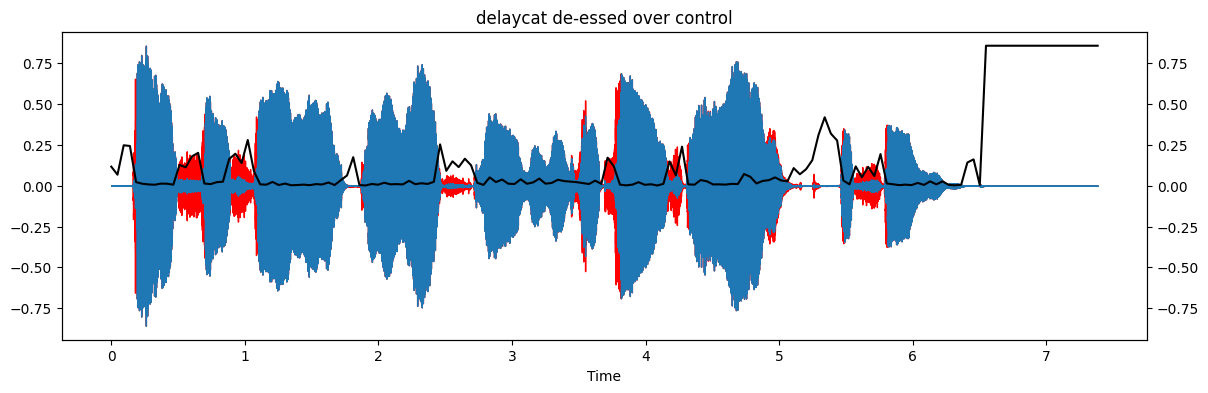

In [7]:
plt.figure(figsize=(14, 4))
plt.title('delaycat de-essed')
librosa.display.waveshow(delaycat, sr=sr)

delaycat_flatness = numpy.array([librosa.feature.spectral_flatness(y=delaycat[i: i + 1024], n_fft=1024)[0, 0] for i in range(0, len(delaycat), 1024)])
t = librosa.frames_to_time(range(len(delaycat_flatness))) * 2
plt.plot(t, delaycat_flatness, color='r')

delaycat_blocks = [delaycat[i : i + 1024] for i in range(0, len(delaycat), 1024)]
delaycat_total_noise = 0
for i in range(len(delaycat_blocks)):
  for s in delaycat_blocks[i]:
    delaycat_total_noise += abs(s) * delaycat_flatness[i]
print('delaycat noise (amp * flatness):', delaycat_total_noise)
delaycat_total_amp = sum(abs(delaycat))
print('delaycat total amp:', delaycat_total_amp)
delaycat_noise_ratio = delaycat_total_noise / delaycat_total_amp
print('delaycat noise ratio (total noise / total amp):', delaycat_noise_ratio)
delaycat_noise_reduction_ratio = delaycat_total_noise / control_total_noise
print('delaycat noise reduction ratio (delaycat noise / control noise):', delaycat_noise_reduction_ratio)

fig = plt.figure(figsize=(14, 4)) #This setups the figure
ax1 = fig.subplots() #Creates the Axes object to display one of the plots
ax2 = ax1.twinx() #Creates a second Axes object that shares the x-axis

plt.title('delaycat de-essed over control')
librosa.display.waveshow(control, sr=sr, ax=ax1, color='r')
librosa.display.waveshow(delaycat, sr=sr, ax=ax2)
max_sample = numpy.max(control) # we just limit the spectral flatness on the plot so everything remains lined up properly
plt.plot(t, [min(max_sample, x) for x in control_flatness], color='black')
plt.show()

##Commercial Audio

Commercial De-Esser that analyzes vocals ahead of time and then de-esses using filtering techniques.

In [8]:
ipd.Audio(commercial, rate=sr)

Below is the plotted waveform, with the spectral flatness overlaid. The second waveform is drawn on top of the dry signal, where the red shows what part of the waveform has been removed.

commercial noise (amp * flatness): 259.98320256408925
commercial total amp: 11178.032749363589
commercial noise ratio (total noise / total amp): 0.023258404085360295
commercial noise reduction ratio (commercial noise / control noise): 0.7850069079575023


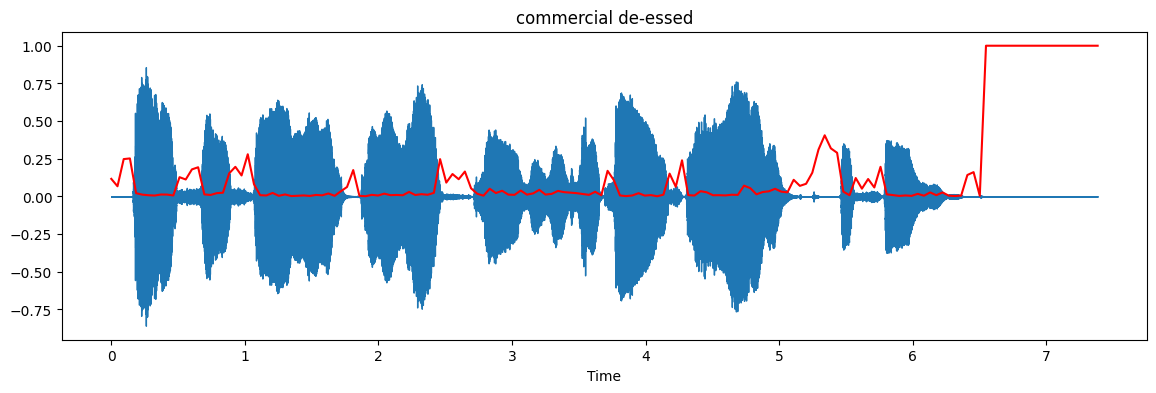

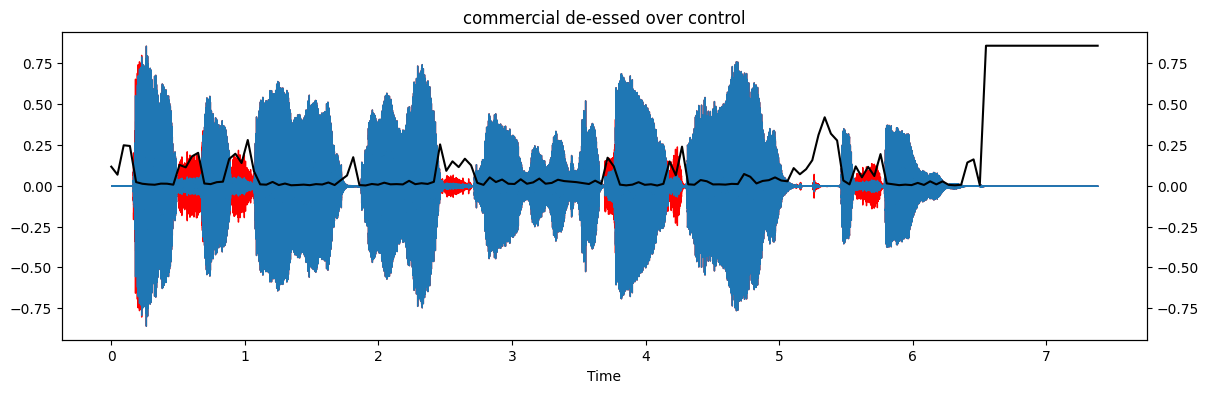

In [9]:
plt.figure(figsize=(14, 4))
plt.title('commercial de-essed')
librosa.display.waveshow(commercial, sr=sr)

commercial_flatness = numpy.array([librosa.feature.spectral_flatness(y=commercial[i: i + 1024], n_fft=1024)[0, 0] for i in range(0, len(commercial), 1024)])
t = librosa.frames_to_time(range(len(commercial_flatness))) * 2
plt.plot(t, commercial_flatness, color='r')

commercial_blocks = [commercial[i : i + 1024] for i in range(0, len(commercial), 1024)]
commercial_total_noise = 0
for i in range(len(commercial_blocks)):
  for s in commercial_blocks[i]:
    commercial_total_noise += abs(s) * commercial_flatness[i]
print('commercial noise (amp * flatness):', commercial_total_noise)
commercial_total_amp = sum(abs(commercial))
print('commercial total amp:', commercial_total_amp)
commercial_noise_ratio = commercial_total_noise / commercial_total_amp
print('commercial noise ratio (total noise / total amp):', commercial_noise_ratio)
commercial_noise_reduction_ratio = commercial_total_noise / control_total_noise
print('commercial noise reduction ratio (commercial noise / control noise):', commercial_noise_reduction_ratio)

fig = plt.figure(figsize=(14, 4)) #This setups the figure
ax1 = fig.subplots() #Creates the Axes object to display one of the plots
ax2 = ax1.twinx() #Creates a second Axes object that shares the x-axis

plt.title('commercial de-essed over control')
librosa.display.waveshow(control, sr=sr, ax=ax1, color='r')
librosa.display.waveshow(commercial, sr=sr, ax=ax2)
max_sample = numpy.max(control) # we just limit the spectral flatness on the plot so everything remains lined up properly
plt.plot(t, [min(max_sample, x) for x in control_flatness], color='black')
plt.show()

##Noise Remaining in De-Essed Signals Plots

Below are plotted bar graphs of the total remaining noise and remaining noise ratios in the de-essed signals.



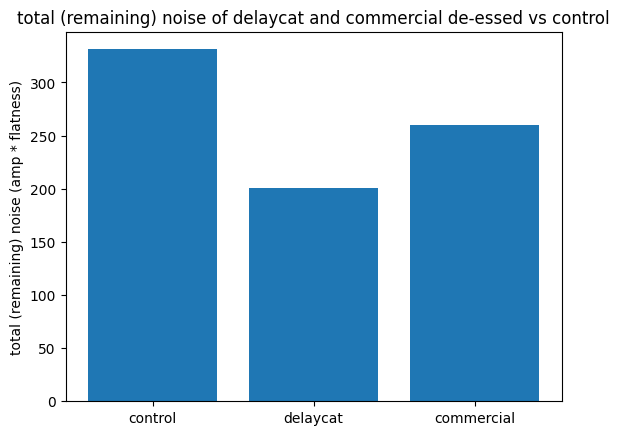

In [10]:
data = {'control' : control_total_noise, 'delaycat' : delaycat_total_noise, 'commercial' : commercial_total_noise}
plt.bar(data.keys(), data.values())
plt.ylabel('total (remaining) noise (amp * flatness)')
plt.title('total (remaining) noise of delaycat and commercial de-essed vs control')
plt.show()

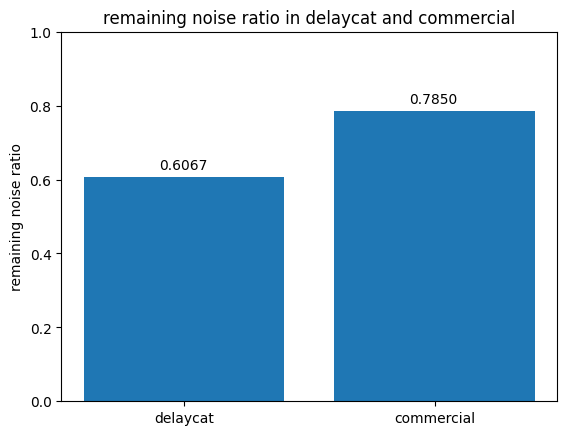

In [11]:
data = {'delaycat' : delaycat_noise_reduction_ratio, 'commercial' : commercial_noise_reduction_ratio}
plt.bar(data.keys(), data.values())
plt.ylim([0.0, 1.0])
for index, value in enumerate(data.values()):
    plt.text(index - 0.1, value + 0.02, '{0:.4f}'.format(value))
plt.ylabel('remaining noise ratio')
plt.title('remaining noise ratio in delaycat and commercial')
plt.show()

##Noise Ratio in De-Essed Signals Plots

Below are plotted bar graphs of the ratio of noise present in the de-essed signals vs the ratio of noise in the control signal.

These results show that de-essers do in fact lower the average amount of noise in the signal. That is to say, they are removing noise at a higher rate than non-noise, compared the normal noise ratio of the original audio, meaning they are selecting audio to filter out well.

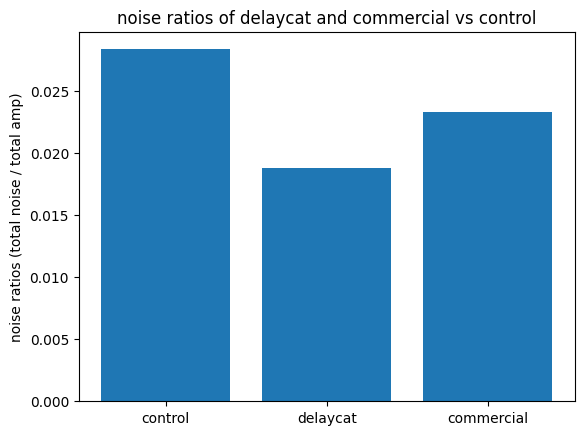

In [12]:
data = {'control' : control_noise_ratio, 'delaycat' : delaycat_noise_ratio, 'commercial' : commercial_noise_ratio}
plt.bar(data.keys(), data.values())
plt.ylabel('noise ratios (total noise / total amp)')
plt.title('noise ratios of delaycat and commercial vs control')
plt.show()

#Waveform Differences

The computed differences between the dry waveform and the de-essed waveforms are below so you can hear and see what is being removed from the original signal.

The DelayCat de-essed signal and the commercial de-essed signal are also differenced to compare the qualities of the different methods.

##DelayCat / Control Difference

delaycat_diff noise (amp * flatness): 151.09695828219307
delaycat_diff total amp: 967.3806205864519
delaycat_diff noise ratio (total noise / total amp): 0.15619183914454898
delaycat_diff noise reduced ratio (delaycat_diff noise / control noise): 0.4562300750705179


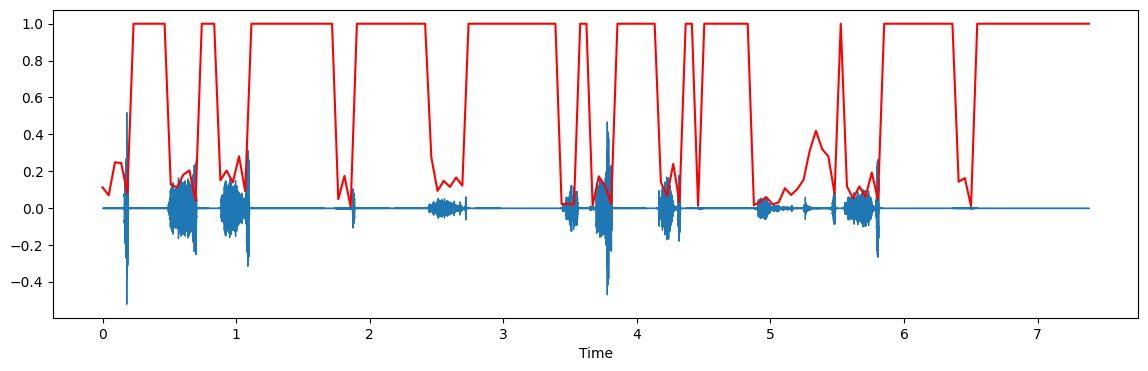

In [13]:
delaycat_diff = numpy.asarray([control[i] - delaycat[i] for i in range(len(control))])
display(ipd.Audio(delaycat_diff, rate=sr))

plt.figure(figsize=(14, 4))
librosa.display.waveshow(delaycat_diff, sr=sr)

delaycat_diff_flatness = numpy.array([librosa.feature.spectral_flatness(y=delaycat_diff[i: i + 1024], n_fft=1024)[0, 0] for i in range(0, len(delaycat_diff), 1024)])
t = librosa.frames_to_time(range(len(delaycat_diff_flatness))) * 2
plt.plot(t, delaycat_diff_flatness, color='r')

delaycat_diff_blocks = [delaycat_diff[i : i + 1024] for i in range(0, len(delaycat_diff), 1024)]
delaycat_diff_total_noise = 0
for i in range(len(delaycat_diff_blocks)):
  for s in delaycat_diff_blocks[i]:
    delaycat_diff_total_noise += abs(s) * delaycat_diff_flatness[i]
print('delaycat_diff noise (amp * flatness):', delaycat_diff_total_noise)
delaycat_diff_total_amp = sum(abs(delaycat_diff))
print('delaycat_diff total amp:', delaycat_diff_total_amp)
delaycat_diff_noise_ratio = delaycat_diff_total_noise / delaycat_diff_total_amp
print('delaycat_diff noise ratio (total noise / total amp):', delaycat_diff_noise_ratio)
delaycat_diff_noise_reduction_ratio = delaycat_diff_total_noise / control_total_noise
print('delaycat_diff noise reduced ratio (delaycat_diff noise / control noise):', delaycat_diff_noise_reduction_ratio)

##Commercial / Control Difference

commercial_diff noise (amp * flatness): 77.93020435870629
commercial_diff total amp: 506.91918260869534
commercial_diff noise ratio (total noise / total amp): 0.15373299538136187
commercial_diff noise reduced ratio (commercial_diff noise / control noise): 0.23530654348733807


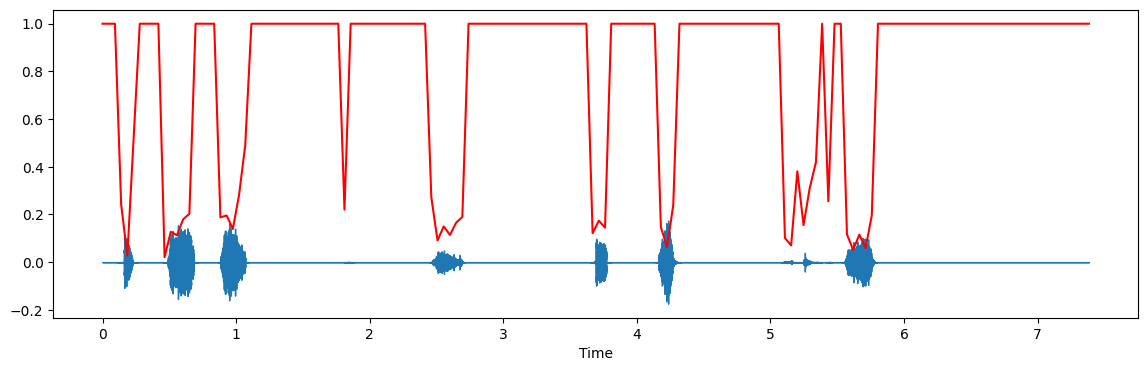

In [14]:
commercial_diff = numpy.asarray([control[i] - commercial[i] for i in range(len(control))])
display(ipd.Audio(commercial_diff, rate=sr))

plt.figure(figsize=(14, 4))
librosa.display.waveshow(commercial_diff, sr=sr)

commercial_diff_flatness = numpy.array([librosa.feature.spectral_flatness(y=commercial_diff[i: i + 1024], n_fft=1024)[0, 0] for i in range(0, len(commercial_diff), 1024)])
t = librosa.frames_to_time(range(len(commercial_diff_flatness))) * 2
plt.plot(t, commercial_diff_flatness, color='r')

commercial_diff_blocks = [commercial_diff[i : i + 1024] for i in range(0, len(commercial_diff), 1024)]
commercial_diff_total_noise = 0
for i in range(len(commercial_diff_blocks)):
  for s in commercial_diff_blocks[i]:
    commercial_diff_total_noise += abs(s) * commercial_diff_flatness[i]
print('commercial_diff noise (amp * flatness):', commercial_diff_total_noise)
commercial_diff_total_amp = sum(abs(commercial_diff))
print('commercial_diff total amp:', commercial_diff_total_amp)
commercial_diff_noise_ratio = commercial_diff_total_noise / commercial_diff_total_amp
print('commercial_diff noise ratio (total noise / total amp):',  commercial_diff_noise_ratio)
commercial_diff_noise_reduction_ratio = commercial_diff_total_noise / control_total_noise
print('commercial_diff noise reduced ratio (commercial_diff noise / control noise):', commercial_diff_noise_reduction_ratio)

Listening to the difference (removed) waveforms, we can hear that they are similar in their removal of sibilance, however there is some difference between then, with DelayCat having a harsher attack that seems to catch a bit more of the surrounding audio.

Below are plotted bar graphs of the total removed noise and removed noise ratios.



##Noise Removed From Control Plots

The charts below plot the ratios of noise removed from the control and remaining the de-essed signals.

This is a measure of the total amount of noise removed by the two methods of de-essing.

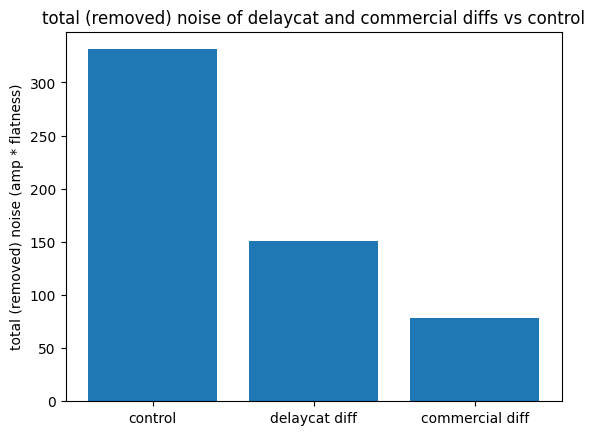

Note: the control noise shown here is the total noise in the dry signal, for comparisons sake


In [15]:
data = {'control' : control_total_noise, 'delaycat diff' : delaycat_diff_total_noise, 'commercial diff' : commercial_diff_total_noise}
plt.bar(data.keys(), data.values())
plt.ylabel('total (removed) noise (amp * flatness)')
plt.title('total (removed) noise of delaycat and commercial diffs vs control')
plt.show()
print('Note: the control noise shown here is the total noise in the dry signal, for comparisons sake')

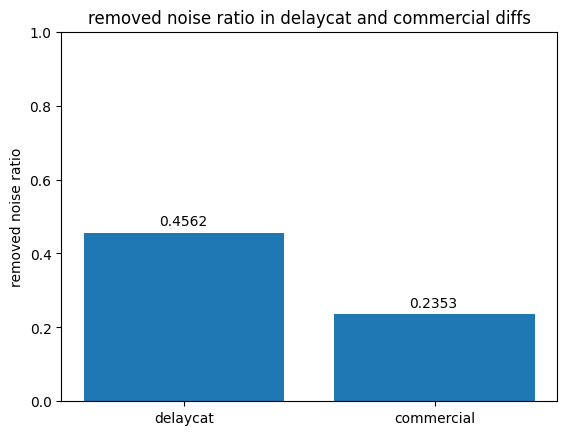

In [16]:
data = {'delaycat' : delaycat_diff_noise_reduction_ratio, 'commercial' : commercial_diff_noise_reduction_ratio}
plt.bar(data.keys(), data.values())
plt.ylim([0.0, 1.0])
for index, value in enumerate(data.values()):
    plt.text(index - 0.1, value + 0.02, '{0:.4f}'.format(value))
plt.ylabel('removed noise ratio')
plt.title('removed noise ratio in delaycat and commercial diffs')
plt.show()

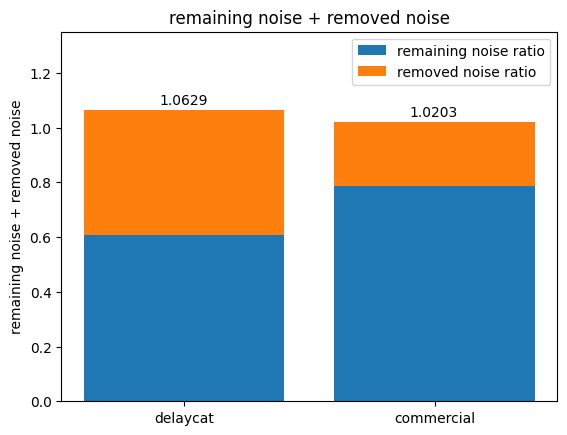

In [17]:
data0 = {'delaycat' : delaycat_noise_reduction_ratio, 'commercial' : commercial_noise_reduction_ratio}
data1 = {'delaycat' : delaycat_diff_noise_reduction_ratio, 'commercial' : commercial_diff_noise_reduction_ratio}
plt.bar(data0.keys(), data0.values(), label='remaining noise ratio')
plt.bar(data1.keys(), data1.values(), bottom=list(data0.values()), label='removed noise ratio')
plt.ylim([0.0, 1.35])
for index, (value0, value1) in enumerate(zip(data0.values(), data1.values())):
    plt.text(index - 0.1, value0 + value1 + 0.02, '{0:.4f}'.format(value0 + value1))
plt.ylabel('remaining noise + removed noise')
plt.title('remaining noise + removed noise')
plt.legend()
plt.show()

Note that the sum of the remaining and removed noise is roughly the amount of noise that both signals started with (1.0), as you would expect.

##Noise Ratio in Waveform Differences Plots

The charts below plot the ratio of noise in the signal.

This is a comporative measure of how noisy the audio is compared to the total amplitude. In other words, this shows how good the selection of audio removed is compared to the control ratio, which would represent a random selection of removed audio or a reduction of gain across the entire waveform.

Both DelayCat and commercial have about the same ratio of noise in the diff, meaning they are about the same in the quality of their filtering of the correct audio removed. This shows that, while DelayCat is removing more noise than commercial, it is about the same in the average quality of audio removed.

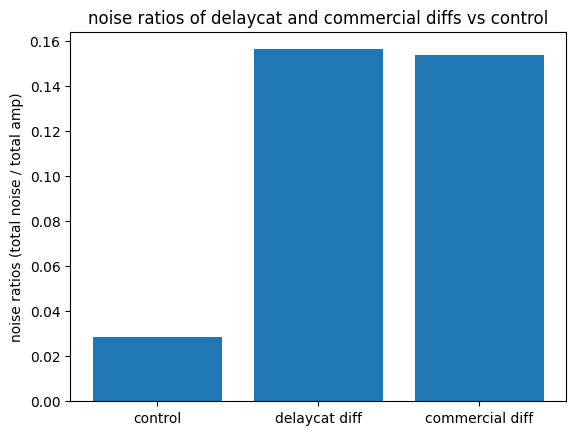

In [18]:
data = {'control' : control_noise_ratio, 'delaycat diff' : delaycat_diff_noise_ratio, 'commercial diff' : commercial_diff_noise_ratio}
plt.bar(data.keys(), data.values())
plt.ylabel('noise ratios (total noise / total amp)')
plt.title('noise ratios of delaycat and commercial diffs vs control')
plt.show()

#Remark On Results

While these results are strong in this scope of evaluation, it should be stated that this isn't making the argument that DelayCat is a "better" de-esser, because that is a much more complicated thing to evaluate. It does however display the efficacy of DelayCat's feature parameter mapping technique.

##DelayCat / Commercial Difference

This diff lets you hear how the two de-essing methods differ in what they remove from the dry signal.

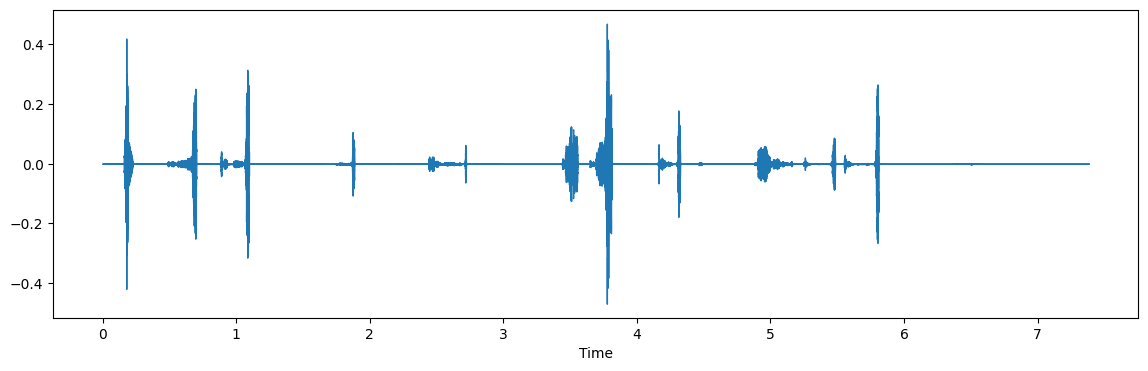

In [19]:
delaycatcommercial_diff = numpy.asarray([delaycat[i] - commercial[i] for i in range(len(delaycat))])
display(ipd.Audio(delaycatcommercial_diff, rate=sr))

plt.figure(figsize=(14, 4))
librosa.display.waveshow(delaycatcommercial_diff, sr=sr)